In [1]:
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

2023-11-01 04:51:15.441841: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 04:51:15.499435: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-01 04:51:15.499473: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-01 04:51:15.499504: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-01 04:51:15.507979: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-01 04:51:15.508553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
PATH = "../fruit_disease_dataset/data"

In [3]:
## Loading Model/home/aadi/Code/fruit-disease-detection-system/m1/detection.py

In [4]:
cnn = tensorflow.keras.models.load_model("fruit_disease_detection_model.h5")

In [5]:
## Visualization and Performing Prediction

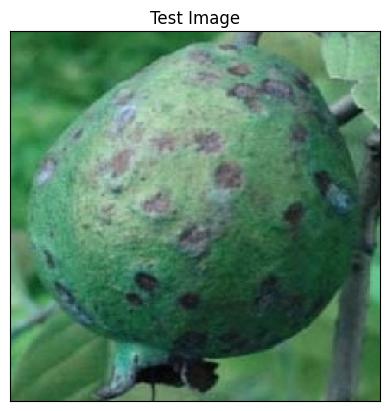

In [55]:
import cv2
image_path = PATH+"/test/GUAVA_scab/593.jpeg"
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [56]:
## Testing Model

In [57]:
image = tensorflow.keras.preprocessing.image.load_img(image_path, target_size=(64,64))
input_array = tensorflow.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array]) # converting single image to batch
prediction = cnn.predict(input_array)

1/1 [==============================] - 0s 34ms/step


In [58]:
print(prediction)

[[1.1282855e-01 1.4536314e-01 1.8184590e-01 3.6537701e-01 1.7427845e-03
  1.7625086e-01 1.4616166e-02 1.5691567e-04 1.9475690e-04 7.0212345e-06
  1.6168673e-03]]


In [59]:
test_dataset = tensorflow.keras.utils.image_dataset_from_directory(
    PATH+"/test",
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = "bilinear",
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 200 files belonging to 11 classes.


In [60]:
# test_dataset.class_names

In [61]:
result_index = np.where(prediction[0] == max(prediction[0]))
print(result_index[0][0])

3


In [62]:
# Single Prediction
print(f"Fruit is: {test_dataset.class_names[result_index[0][0]]}")

Fruit is: APPLE_scab
